In [51]:
import pandas as pd
import numpy as np


In [52]:
data=pd.read_csv('bank-full.csv',header=0,delimiter=';')

In [53]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [54]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [55]:
data.shape

(45211, 17)

In [56]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [57]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [58]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
data.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

Encoding columns

In [60]:
cols=['default','housing','loan','y']
data[cols]=data[cols].apply(lambda x:x.map({'yes':1,'no':0}))

In [61]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [62]:
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_cols=['job','marital','education','contact','month','poutcome']
data[label_cols]=data[label_cols].apply(LabelEncoder().fit_transform)

In [68]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [69]:
#for numerical columns


In [75]:
data['pdays'].replace(-1,0,inplace=True)

C:\Users\EgrYt\AppData\Local\Temp\ipykernel_17504\1481366579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pdays'].replace(-1,0,inplace=True)


In [77]:
data['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [76]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

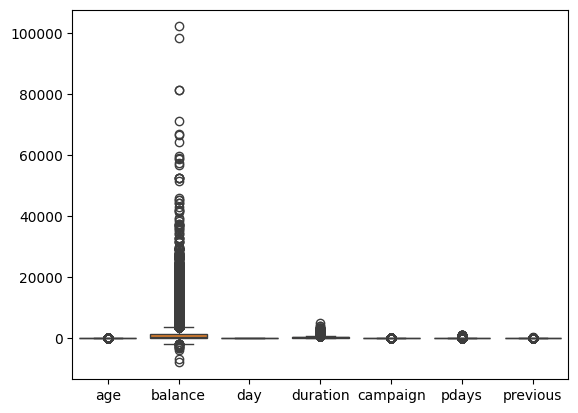

In [80]:
cols1=['age','balance','day','duration','campaign','pdays','previous']
sns.boxplot(data=data[cols])

<Axes: >

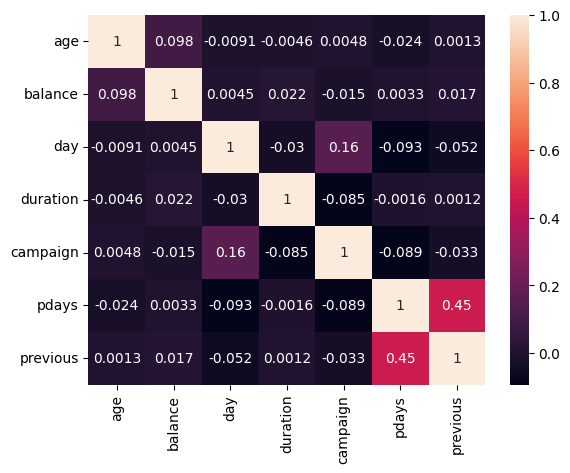

In [83]:
df1=data[cols1]
sns.heatmap(df1.corr(),annot=True)

In [84]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0


In [85]:
#capping outlier from balance column
capp_data=data.copy()

In [86]:
capp_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,0,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,0,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,0,0,3,0


In [87]:
from scipy import stats

In [89]:
q1=capp_data['balance'].quantile(0.25)
q3=capp_data['balance'].quantile(0.75)
iqr=q3-q1

In [90]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [91]:
capp_data.loc[capp_data['balance']>upper_limit,'balance']=upper_limit
capp_data.loc[capp_data['balance']<lower_limit,'balance']=lower_limit

In [92]:
#scaling the datas 
cols_to_scale=['balance','day','duration','campaign','pdays','previous']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [94]:
capp_data[cols_to_scale]=scaler.fit_transform(capp_data[cols_to_scale])

In [95]:
capp_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,1.027653,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411009,-0.25194,3,0
1,44,9,2,1,0,-0.768817,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411009,-0.25194,3,0
2,33,2,1,1,0,-0.791761,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411009,-0.25194,3,0
3,47,1,1,3,0,0.486333,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411009,-0.25194,3,0
4,33,11,2,3,0,-0.792611,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411009,-0.25194,3,0


In [99]:
#implementing logistic regression

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
x=capp_data.drop('y',axis=1)
y=capp_data['y']


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [104]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [106]:
confusion_matrix(y_test,predictions)


array([[7789,  163],
       [ 843,  248]])

In [107]:
accuracy_score(y_test,predictions)


0.8887537321685282

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.23      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

